In [57]:
import numpy as n
import scipy as sp
from scipy.stats import triang, norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random

* https://en.wikipedia.org/wiki/Triangular_distribution
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html#scipy.stats.triang

In [3]:
#Сгенерируйте выборку объёма 1000
c = 0.7
size = 1000
sample = triang(c=c).rvs(size=size)

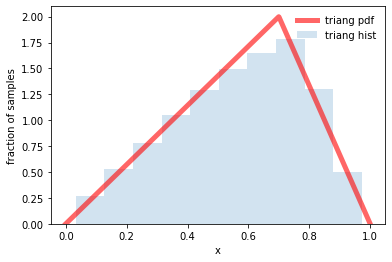

In [4]:
#постройте гистограмму выборки
fig, ax = plt.subplots(1, 1)
ax.hist(sample, density=True, histtype='stepfilled', alpha=0.2, label='triang hist')

#нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины 
#чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True
x = np.linspace(0, 1, size) #Return evenly spaced numbers over a specified interval.
ax.plot(x, triang.pdf(x, c), 'r-', lw=5, alpha=0.6, label='triang pdf')
ax.legend(loc='best', frameon=False)
plt.ylabel('fraction of samples')
plt.xlabel('x')
plt.show()

In [18]:
#оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок
#сгенерируйте 1000 выборок объёма n  
n_samples = 1000
variates = triang(c=c).rvs(size=n_samples) 

In [58]:
np.set_printoptions(precision=3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.set_printoptions is deprecated and will be removed in SciPy 2.0.0, use numpy.set_printoptions instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
#что нам в принципе следует ожидать
population_mean, population_variance = triang.stats(c)
print("{:1.4f}".format(population_mean),  "{:1.4f}".format(population_variance))

0.5667 0.0439


0.0937


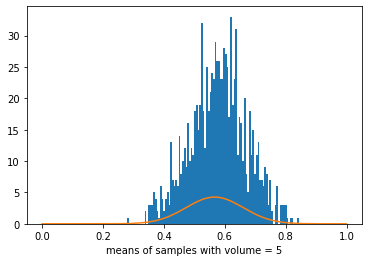

In [85]:
#постройте гистограммы распределений их выборочных средних
volume = 5
samples = [random.sample(list(variates), volume) for i in range(n_samples)]
means = [np.mean(s) for s in samples]
weights = np.ones_like(means)
plt.hist(means, bins=100, weights=weights)

# зададим нормально распределенную случайную величину
std_error = np.sqrt(population_variance/volume)
print("{:1.4f}".format(std_error))
norm_rv = norm(loc=population_mean, scale=std_error)
x = np.linspace(0, 1, n_samples)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.xlabel("means of samples with volume = {0}".format(volume))
plt.show()

0.0662


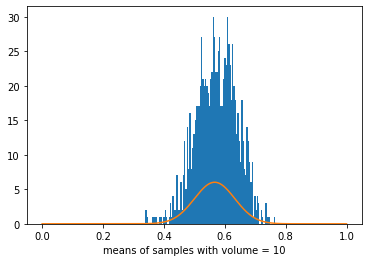

In [86]:
# n = 10
volume = 10
samples = [random.sample(list(variates), volume) for i in range(n_samples)]
means = [np.mean(s) for s in samples]
weights = np.ones_like(means) 
plt.hist(means, bins=100, weights=weights)

# зададим нормально распределенную случайную величину
std_error = np.sqrt(population_variance/volume)
print("{:1.4f}".format(std_error))
norm_rv = norm(loc=population_mean, scale=std_error)
x = np.linspace(0, 1, n_samples)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.xlabel("means of samples with volume = {0}".format(volume))
plt.show()

0.0541


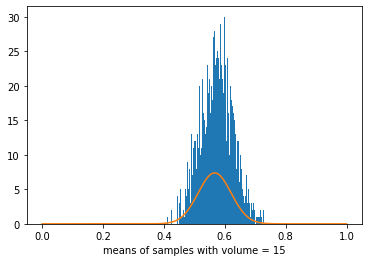

In [87]:
volume = 15
samples = [random.sample(list(variates), volume) for i in range(n_samples)]
means = [np.mean(s) for s in samples]
weights = np.ones_like(means)
plt.hist(means, bins=100, weights=weights)

# зададим нормально распределенную случайную величину
std_error = np.sqrt(population_variance/volume)
print("{:1.4f}".format(std_error))
norm_rv = norm(loc=population_mean, scale=std_error)
x = np.linspace(0, 1, n_samples)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.xlabel("means of samples with volume = {0}".format(volume))
plt.show()

##### Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии) посчитайте значения параметров нормальных распределений для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. 

я это делала по ходу построения выборок. 
Подытожу:
* среднее = 0.5667 дисперсия = 0.0439 - это те значения, к которым выборки должны стремиться:

`population_mean, population_variance = triang.stats(c)`

###### (значения среднеквадрат. отклонения будут отличаться, так как каждый раз перезапуск random):
* при n = 5: стандартная ошибка (среднеквадрат. отклонение выборки) = 0.0960
* при n = 10: стандартная ошибка (среднеквадрат. отклонение выборки) = 0.0679
* при n = 15: стандартная ошибка (среднеквадрат. отклонение выборки) = 0.0554
   
###### Вывод:
Мы видим, что с увеличением объема выборки точность повышается - стандарная ошибка понижается

0.0171


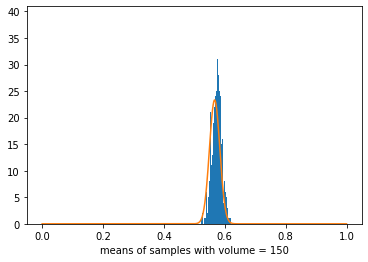

In [88]:
volume = 150
samples = [random.sample(list(variates), volume) for i in range(n_samples)]
means = [np.mean(s) for s in samples]
weights = np.ones_like(means)
plt.hist(means, bins=100, weights=weights)

# зададим нормально распределенную случайную величину
std_error = np.sqrt(population_variance/volume)
print("{:1.4f}".format(std_error))
norm_rv = norm(loc=population_mean, scale=std_error)
x = np.linspace(0, 1, n_samples)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.xlabel("means of samples with volume = {0}".format(volume))
plt.show()